# Pre-processing Steps


In [1]:
# Basis Library
import os , sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.getcwd()

'C:\\Users\\ardra\\PycharmProjects\\pythonProject\\Data-science-study\\ML'

In [3]:
df= pd.read_excel('Employee_Data.xls')
df

,Employee Id,First Name,Last Name,Department,Age,Experience,Salary
0,1,Joy,Bass,Sales and Marketing,28.0,3.0,32889
1,2,Sheila,Garza,Sales and Marketing,22.0,1.0,15944
2,3,John,Bryant,Customer Relations,22.0,1.0,40343
3,4,Christian,Farley,Customer Relations,22.0,1.0,19018
4,5,Colorado,Bowen,Accounting,27.0,0.0,24795
...,...,...,...,...,...,...,...
95,96,Tyrone,Barber,Sales and Marketing,47.0,22.0,79077
96,97,Urielle,Herrera,Sales and Marketing,46.0,20.0,81187
97,98,Brendan,Solis,Customer Relations,44.0,18.0,83847
98,99,Holmes,Nelson,Customer Relations,47.0,22.0,89158


In [4]:
mydata= df.copy()
mydata

,Employee Id,First Name,Last Name,Department,Age,Experience,Salary
0,1,Joy,Bass,Sales and Marketing,28.0,3.0,32889
1,2,Sheila,Garza,Sales and Marketing,22.0,1.0,15944
2,3,John,Bryant,Customer Relations,22.0,1.0,40343
3,4,Christian,Farley,Customer Relations,22.0,1.0,19018
4,5,Colorado,Bowen,Accounting,27.0,0.0,24795
...,...,...,...,...,...,...,...
95,96,Tyrone,Barber,Sales and Marketing,47.0,22.0,79077
96,97,Urielle,Herrera,Sales and Marketing,46.0,20.0,81187
97,98,Brendan,Solis,Customer Relations,44.0,18.0,83847
98,99,Holmes,Nelson,Customer Relations,47.0,22.0,89158


In [5]:
# How many data poits and features have? 
df.shape

(100, 7)

In [6]:
# What are the columns name given in our data set
df.columns

Index(['Employee Id', 'First Name', 'Last Name', 'Department', 'Age',
       'Experience', 'Salary'],
      dtype='object')

In [7]:
df['Department'].value_counts()

Sales and Marketing    30
Accounting             27
Customer Relations     24
Name: Department, dtype: int64

In [9]:
# What are the data types we have?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Employee Id  100 non-null    int64  
 1   First Name   100 non-null    object 
 2   Last Name    100 non-null    object 
 3   Department   81 non-null     object 
 4   Age          82 non-null     float64
 5   Experience   90 non-null     float64
 6   Salary       100 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 5.6+ KB


In [10]:
# pre-processing
# Part 1  :Handling Missing value
df.isnull().sum()/len(df)*100

Employee Id     0.0
First Name      0.0
Last Name       0.0
Department     19.0
Age            18.0
Experience     10.0
Salary          0.0
dtype: float64

In [12]:
# imputation is required in the missing variable
# Department - Object
# Age and Experience - Number
df['Department'].value_counts()

Sales and Marketing    30
Accounting             27
Customer Relations     24
Name: Department, dtype: int64

In [13]:
df['Department'] = df['Department'].fillna('Sales and Marketing')

In [14]:
df['Department'].value_counts()

Sales and Marketing    49
Accounting             27
Customer Relations     24
Name: Department, dtype: int64

<AxesSubplot:ylabel='Age'>

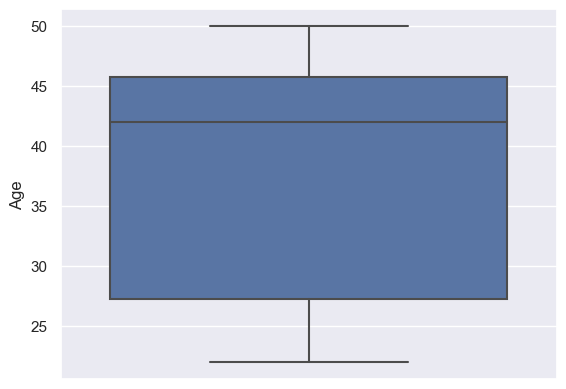

In [15]:
# Age and Experience - Numerical variables
# Mean or Median depending on outlier
# If outlier found median, If no outlier mean
sns.boxplot(y= 'Age', data=df)

<AxesSubplot:ylabel='Experience'>

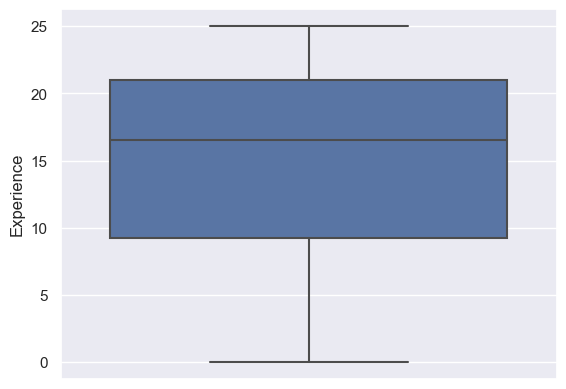

In [16]:
# No outlier : We can go with mean
sns.boxplot(y= 'Experience', data=df)

In [17]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [18]:
df['Age'].value_counts()

37.97561    18
44.00000    11
22.00000     8
47.00000     6
41.00000     6
48.00000     6
42.00000     5
46.00000     4
45.00000     4
25.00000     4
24.00000     3
26.00000     3
27.00000     3
49.00000     3
43.00000     2
33.00000     2
30.00000     2
29.00000     2
50.00000     2
28.00000     1
38.00000     1
40.00000     1
35.00000     1
36.00000     1
39.00000     1
Name: Age, dtype: int64